# **TP OPTIMIZATION - 05/10/2021**







---
---



In the following TP we will look at Regularization in several context. First we will implement a Linear Regression model with regulatization using Stochastic Gradient Descent as an optimizer. We will then attempt to classify images from the CIFAR dataset (https://www.cs.toronto.edu/~kriz/cifar.html) using different classifier and different parameter-optimization methods. 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn 
seaborn.set()

### Part 1. Understanding Regularization 

In the following example we will generate a simple dataset and try to regress it. We will then observe the effect of regularization by implementing in it in out regression model. 


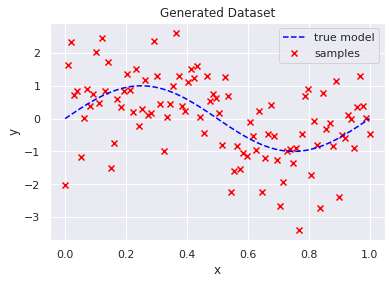

In [ ]:
x = np.linspace(0, 1, 100) #We generate 100 points between 0 and 1 
y = np.sin(2*np.pi*x) #We geneerate the y values such that y=sin(4*pi*x)
y_noisy = y + np.random.normal(0, 1, len(x)) #we add gaussian noise to our ground truths

# WE NOW PLOT OUR DATA FOR OBSERVATION 

plt.plot(x, y, "--", color="blue", label="true model")
plt.scatter(x, y_noisy, marker="x", color="red", label="samples")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Dataset")
plt.show()


We will now implement a regression model without regularization and see how it fits out model 


We are going to solve the regression problem using the Least Square methom, which implies that we are minimizing the Least Square cost function on the Design Matrix (Matrix of polynomial feature). 

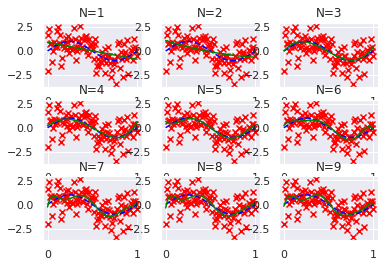

In [ ]:
def polynomial_regression(features, truth):
  # features: inputs (n_lines samples for n_columns variables)
  # truth:    measured outputs (n_lines observations)
  # ===========================================================
  # fits the linear model using the features and truth provided
  # then, using this model, returns the estimation of the data used to train it (hopefully, close to the truth variable)
  theta = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(truth) # best parameters, without regularization
  y_pred = features.dot(theta) # now that we now the best params, we compute the predicted output y = features * theta
  return y_pred

f, ax = plt.subplots(3, 3)
ax = ax.flatten()

# TASK 1: 
#CREATE DESIGN MATRIX FOR N=1, ..., 9 DEGREE POLYNOMIAL AND FIT THEM USING THE 
#FUNCTION ABOVE (polynomial_regression) AND PLOT ALL YOUR REGRESSIONS USING THE 
#GIVEN CODE. NAME YOUR PREDICTIONS AT EACH ITERATION: predictions

for i in range(1, 10): 

  ##YOUR CODE STARTS HERE## (define X)
  
  # X is the sample matrix :
  # the line n°i represents the sample n°i
  # the column n°j represents the variables x^j
  vertical_x = x[:, np.newaxis]
  X = np.power(vertical_x, 0)
  for k in range(1, i+1):
    X = np.concatenate( (X, np.power(vertical_x, k)), axis = 1)

  ##YOUR CODE ENDS HERE##
  predictions = polynomial_regression(X, y_noisy)

  ax[i-1].plot(x, y, "--", color="blue", label="true model")
  ax[i-1].scatter(x, y_noisy, marker="x", color="red", label="samples")
  ax[i-1].plot(x, predictions, color="green", label="prediction")
  ax[i-1].set_title("N="+str(i))

plt.show()


**Q1**:  Describe what you observe as we increase the complexity of the model?

**Answer:** we notice that when the degree of the polynomial increases (ie the complexity increases), the model varies more violently. When printing the $\theta$ matrix for debugging, I also noticed that its norm increasing with the complexity. This is called overfitting.

We will now add Regularization terms to our regression. This time you will implement the analytical solution to the regression given the regularization term as seen in the slides. 


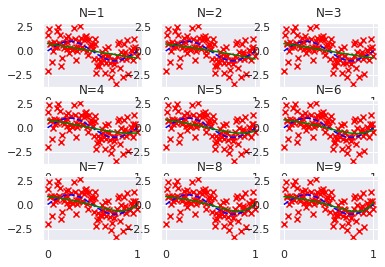

In [ ]:
# TASK 2:  
#IMPLEMENT POLYNOMIAL RIFE REGRESSION AS SEEN IN THE SLIDES. GENERATE THE 
#DESIGN MATRIX FOR EACH DEGREE OF THE POLYNOMIALS AND PLOT THE RESULTS 
#USING THE GIVEN FUNCTION 

def polynomial_ridge_regression(features, truth, lambda_value):

  ## YOUR CODE GOES HERE ##
  theta = np.linalg.inv(features.T.dot(features) + lambda_value * np.eye(features.shape[1])).dot(features.T).dot(truth) # best parameters, with regularization
                        
  ## YOUR CODE GOES HERE ##

  return features.dot(theta) 

f, ax = plt.subplots(3, 3)
ax = ax.flatten()

for i in range(1, 10): 

  ##YOUR CODE STARTS HERE##
  
  # X is the sample matrix :
  # the line n°i represents the sample n°i
  # the column n°j represents the variables x^j
  vertical_x = x[:, np.newaxis]
  X = np.power(vertical_x, 0)
  for k in range(1, i+1):
    X = np.concatenate( (X, np.power(vertical_x, k)), axis = 1)

  ##YOUR CODE ENDS HERE##
  predictions = polynomial_ridge_regression(X, y_noisy, lambda_value=1)
  
  ax[i-1].plot(x, y, "--", color="blue", label="true model")
  ax[i-1].scatter(x, y_noisy, marker="x", color="red", label="samples")
  ax[i-1].plot(x, predictions, color="green", label="prediction")
  ax[i-1].set_title("N="+str(i))

plt.show()


**Q2**:  Describe what you observe after the introduction of the regularization term?

**Answer:** the model does not overfit anymore. The regularization term prevents $\theta$ from reaching high values, and avoids violent variations.

We will now look at the role the lambda term plays in the regression. We will now only focus on the regression of the polynomial features of the 9th degree. 

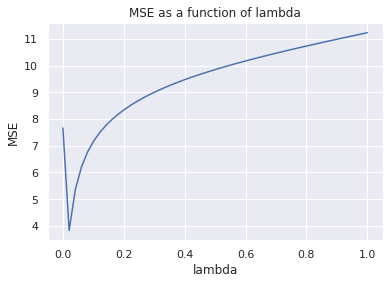

In [ ]:
def MSE(pred, truth): 
  ## YOUR CODE STARTS HERE ##
  mse = np.linalg.norm(pred - truth) ** 2
  ## YOUR CODE ENDS HERE ##
  return mse 

##YOUR CODE STARTS HERE## 
#(generate design matrix for degree=9)

  # X is the sample matrix :
  # the line n°i represents the sample n°i
  # the column n°j represents the variables x^j
  vertical_x = x[:, np.newaxis]
  X = np.power(vertical_x, 0)
  for k in range(1, 10):
    X = np.concatenate( (X, np.power(vertical_x, k)), axis = 1)

##YOUR CODE ENDS HERE##

errors = []
lambdas = np.linspace(0, 1, 50)
for l in lambdas: 
  predictions = polynomial_ridge_regression(X, y_noisy, lambda_value=l)
  e = MSE(predictions, y)
  errors.append(e)

plt.plot(lambdas, errors)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.title("MSE as a function of lambda")
plt.show()


**Q3**: Explain what you observe as we vary the value of the lambda term in the regulatization term

**Answer**: we have three cases:
* when $\lambda$ is too low, our model suffers from the first problem we noticed (overfitting)
* when $\lambda$ is too high, our model strongly limits the norm of $\theta$ and prevents the model from learning correctly (we do not permit him to reach the values it should be using)
* when $\lambda$ is optimal, our model has the lowest MSE

An ideal value for $\lambda$ would be 0.01 for instance.

**TASK 3**: Using the method shown above as well as any other regularization method shown in class, implement from scratch a regularized regression model on the given dataset. 
Show your results in a plot like the one presented above and present clearly your MSE. (results not shown clearly will not be considered) 

TIPS: You can use LASSO regression or Elastic Net regression, but the simplest solution might be to play around with the complexity of the model (degree of the polynomial) and the lambda value. 


Text(0.5, 1.0, 'deg=3, lambd=0.0, mse=1.53')

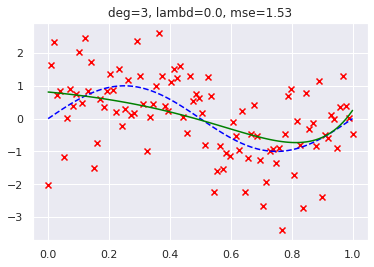

In [ ]:
## START YOUR CODE HERE ##

# some utils

def polynomial_ridge_regression(features, truth, lambda_value):
  theta = np.linalg.inv(features.T.dot(features) + lambda_value * np.eye(features.shape[1])).dot(features.T).dot(truth) # best parameters, with regularization
  return features.dot(theta)

def MSE(pred, truth): 
  mse = np.linalg.norm(pred - truth) ** 2
  return mse

# we try several models with different regularizations

degrees = np.array(range(1, 10))
lambdas = np.array(np.linspace(0, 1, 50))
results = np.empty( (degrees.shape[0], lambdas.shape[0]) )

for degree_index, degree in enumerate(degrees):
  for lambda_index, lambda_value in enumerate(lambdas):
    # X is the sample matrix :
    # the line n°i represents the sample n°i
    # the column n°j represents the variables x^j
    vertical_x = x[:, np.newaxis]
    X = np.power(vertical_x, 0)
    for k in range(1, degree + 1):
      X = np.concatenate( (X, np.power(vertical_x, k)), axis = 1)

    predictions = polynomial_ridge_regression(X, y_noisy, lambda_value)
    mse = MSE(predictions, y)
    results[degree_index, lambda_index] = mse

# we retrieve the best model
raw_index = np.argmin(results)
index = (raw_index // lambdas.shape[0], raw_index % lambdas.shape[0])
min_mse = results[index]

# we recompute the model, not long, better than storing a lot of models

vertical_x = x[:, np.newaxis]
X = np.power(vertical_x, 0)

degree = degrees[index[0]]
lambda_value = lambdas[index[1]]

for k in range(1, degree + 1):
  X = np.concatenate( (X, np.power(vertical_x, k)), axis = 1)
  prediction = polynomial_ridge_regression(X, y_noisy, lambda_value)

# we plot it

plt.plot(x, y, "--", color="blue", label="true model")
plt.scatter(x, y_noisy, marker="x", color="red", label="samples")
plt.plot(x, predictions, color="green", label="prediction")
plt.title("deg=" + str(degree) + ", lambd=" + str(lambda_value) + ", mse=" + "{:.2f}".format(min_mse))

## END YOUR COEE HERE ## 

### Part 2. Regularization on Deep Learning 

We will now look at the effect of regularization with Deep Learning methods using the CIFAR dataset. 

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

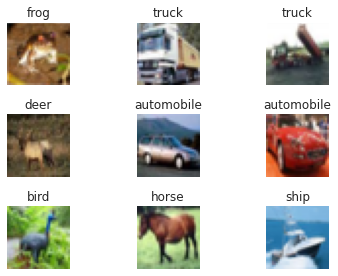

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
validation_split=.5 #We use half of the training data as validation
nepochs=100
batch_size=512
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

f, ax = plt.subplots(3,3)
ax = ax.flatten()

for i in range(0, 9): 
  img = X_train[i]
  label = cifar_classes[int(y_train[i])]
  ax[i].imshow(img)
  ax[i].set_title(label)
  ax[i].axis(False)

plt.tight_layout()
plt.show()

In [ ]:
#FIRST WE MUST FORMAT OUR DATA FOR THE MLP CLASSIFIER 

# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)
X_train = np.reshape(X_train,(50000,3072)).astype('float32')
X_test = np.reshape(X_test,(10000,3072)).astype('float32')

# Normalization of pixel values (to [0-1] range)
X_train /= 255
X_test /= 255

In [ ]:
# SECONDLY, WE GENERATE AND TRAIN OUR MLP ON THE TRAINING DATA
def create_MLP():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=3072))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

def get_optimizer():
  return SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model=create_MLP()
model.compile(optimizer=get_optimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
historyMLP = model.fit(X_train,y_train, epochs=nepochs, batch_size=batch_size, verbose=2, validation_split=validation_split)

Epoch 1/100
49/49 - 4s - loss: 2.0664 - accuracy: 0.2566 - val_loss: 1.9087 - val_accuracy: 0.3213
Epoch 2/100
49/49 - 3s - loss: 1.8339 - accuracy: 0.3556 - val_loss: 1.8266 - val_accuracy: 0.3582
Epoch 3/100
49/49 - 3s - loss: 1.7519 - accuracy: 0.3858 - val_loss: 1.7632 - val_accuracy: 0.3772
Epoch 4/100
49/49 - 4s - loss: 1.6983 - accuracy: 0.4043 - val_loss: 1.7006 - val_accuracy: 0.4035
Epoch 5/100
49/49 - 3s - loss: 1.6535 - accuracy: 0.4209 - val_loss: 1.6908 - val_accuracy: 0.4010
Epoch 6/100
49/49 - 3s - loss: 1.6158 - accuracy: 0.4320 - val_loss: 1.6541 - val_accuracy: 0.4228
Epoch 7/100
49/49 - 3s - loss: 1.5822 - accuracy: 0.4465 - val_loss: 1.6388 - val_accuracy: 0.4229
Epoch 8/100
49/49 - 3s - loss: 1.5474 - accuracy: 0.4576 - val_loss: 1.6084 - val_accuracy: 0.4344
Epoch 9/100
49/49 - 3s - loss: 1.5298 - accuracy: 0.4632 - val_loss: 1.5850 - val_accuracy: 0.4420
Epoch 10/100
49/49 - 3s - loss: 1.5032 - accuracy: 0.4760 - val_loss: 1.6234 - val_accuracy: 0.4329
Epoch 11/

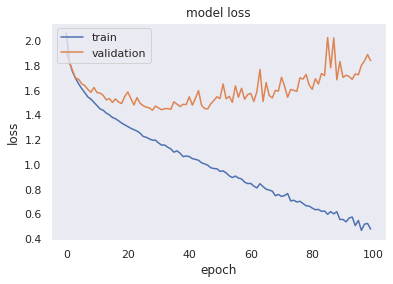

Evaluation on Testing set
{'loss': 1.8197299242019653, 'accuracy': 0.4977000057697296}


In [ ]:
## WE CAN NOW PLOT THE LOSS AS A FUNCTION OF THE EPOCHS AND OBSERVE THE CONVERGENCE OF THE MODEL AS WELL AS ASSESS IT ON THE TEST SET 
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid()
    plt.show()

plotLosses(historyMLP)
print('Evaluation on Testing set')
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(dict(zip(model.metrics_names, score)))

**Q4**: What phenomena do you observe here ? 

**Answer**: I notice a strong overfitting, starting early (at 20/100 epochs). 

We will now use Deep Learning regularization methods on this MLP classifier: 

**Callbacks**



1.   Use EarlyStopping: stop the training if there are not improvement in the validation loss after a given number of epochs (patience parameter = 10).
2.   RecudeLR: during training, the learning rate is reduce if there is not improvement in the validation loss after a given number of epochs (patience parameter = 5)

Epoch 1/100
49/49 - 3s - loss: 2.0385 - accuracy: 0.2649 - val_loss: 1.8948 - val_accuracy: 0.3305
Epoch 2/100
49/49 - 3s - loss: 1.8148 - accuracy: 0.3618 - val_loss: 1.8002 - val_accuracy: 0.3738
Epoch 3/100
49/49 - 3s - loss: 1.7355 - accuracy: 0.3908 - val_loss: 1.7305 - val_accuracy: 0.3929
Epoch 4/100
49/49 - 3s - loss: 1.6818 - accuracy: 0.4096 - val_loss: 1.6824 - val_accuracy: 0.4121
Epoch 5/100
49/49 - 3s - loss: 1.6334 - accuracy: 0.4255 - val_loss: 1.6845 - val_accuracy: 0.4036
Epoch 6/100
49/49 - 3s - loss: 1.6060 - accuracy: 0.4357 - val_loss: 1.6311 - val_accuracy: 0.4274
Epoch 7/100
49/49 - 3s - loss: 1.5749 - accuracy: 0.4465 - val_loss: 1.6146 - val_accuracy: 0.4335
Epoch 8/100
49/49 - 3s - loss: 1.5408 - accuracy: 0.4618 - val_loss: 1.6031 - val_accuracy: 0.4400
Epoch 9/100
49/49 - 3s - loss: 1.5185 - accuracy: 0.4667 - val_loss: 1.6020 - val_accuracy: 0.4344
Epoch 10/100
49/49 - 3s - loss: 1.4913 - accuracy: 0.4772 - val_loss: 1.5791 - val_accuracy: 0.4422
Epoch 11/

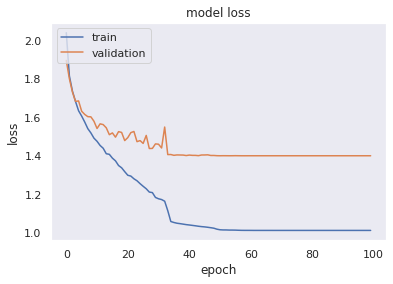

Evaluation on Testing set
{'loss': 1.3749408721923828, 'accuracy': 0.5188000202178955}


In [ ]:
## TASK 1: CREATE A LEARNING RATE SCHEDULER CALLBACK AND ADD IT TO THE MLP TRAINING, PLOT YOUR TRAINIG LOGS (using plotLosses) AND SHOW THE SCORES ON THE TESTING SET

from tensorflow.keras.callbacks import ReduceLROnPlateau

## YOUR CODE STARTS HERE 

def create_MLP():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=3072))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

def get_optimizer():
  return SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model=create_MLP()
model.compile(optimizer=get_optimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
callback = ReduceLROnPlateau(monitor='val_loss', patience=5)
historyMLP = model.fit(X_train,y_train, epochs=nepochs, batch_size=batch_size, callbacks=[callback], verbose=2, validation_split=validation_split)

def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid()
    plt.show()

plotLosses(historyMLP)
print('Evaluation on Testing set')
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(dict(zip(model.metrics_names, score)))

## YOUR CODE ENDS HERE 

**Q5**: What has been the effect of reducing the learning rate ? 

**Answer**: reducing the learning rate allowed the model to reach a low loss : when reaching a plateau, the model learned more slowly in order to get closer to the minimum without "skipping" it.

Epoch 1/100
49/49 - 3s - loss: 2.0458 - accuracy: 0.2635 - val_loss: 1.9100 - val_accuracy: 0.3166
Epoch 2/100
49/49 - 3s - loss: 1.8322 - accuracy: 0.3504 - val_loss: 1.8106 - val_accuracy: 0.3641
Epoch 3/100
49/49 - 3s - loss: 1.7547 - accuracy: 0.3830 - val_loss: 1.7666 - val_accuracy: 0.3746
Epoch 4/100
49/49 - 3s - loss: 1.6988 - accuracy: 0.4037 - val_loss: 1.7226 - val_accuracy: 0.3922
Epoch 5/100
49/49 - 3s - loss: 1.6539 - accuracy: 0.4204 - val_loss: 1.6711 - val_accuracy: 0.4147
Epoch 6/100
49/49 - 3s - loss: 1.6107 - accuracy: 0.4384 - val_loss: 1.6654 - val_accuracy: 0.4103
Epoch 7/100
49/49 - 3s - loss: 1.5841 - accuracy: 0.4464 - val_loss: 1.6315 - val_accuracy: 0.4280
Epoch 8/100
49/49 - 3s - loss: 1.5509 - accuracy: 0.4560 - val_loss: 1.6201 - val_accuracy: 0.4338
Epoch 9/100
49/49 - 3s - loss: 1.5220 - accuracy: 0.4684 - val_loss: 1.6180 - val_accuracy: 0.4293
Epoch 10/100
49/49 - 3s - loss: 1.4985 - accuracy: 0.4734 - val_loss: 1.5678 - val_accuracy: 0.4507
Epoch 11/

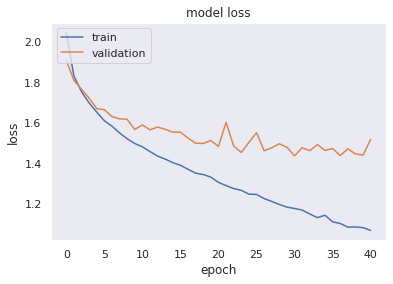

Evaluation on Testing set
{'loss': 1.502260684967041, 'accuracy': 0.4860000014305115}


In [ ]:
## TASK 2: CREATE AN EARLY STOPPING CALLBACK AND ADD IT TO THE MLP TRAINING, PLOT YOUR TRAINIG LOGS (using plotLosses) AND SHOW THE SCORES ON THE TESTING SET

from tensorflow.keras.callbacks import EarlyStopping

## YOUR CODE STARTS HERE 

def create_MLP():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=3072))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

def get_optimizer():
  return SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model=create_MLP()
model.compile(optimizer=get_optimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss', patience=10)
historyMLP = model.fit(X_train,y_train, epochs=nepochs, batch_size=batch_size, callbacks=[callback], verbose=2, validation_split=validation_split)

def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid()
    plt.show()

plotLosses(historyMLP)
print('Evaluation on Testing set')
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(dict(zip(model.metrics_names, score)))

## YOUR CODE ENDS HERE 

**Q6**: What has been the effect of adding early stopping? 

**Answer**: adding early stopping prevents the model from too much overfitting (in my case, the loss decreased from 1.8 to 1.6). Furthermore, it speeds up the training process.

Epoch 1/100
49/49 - 4s - loss: 2.0788 - accuracy: 0.2392 - val_loss: 1.9034 - val_accuracy: 0.3308
Epoch 2/100
49/49 - 3s - loss: 1.8649 - accuracy: 0.3370 - val_loss: 1.8049 - val_accuracy: 0.3684
Epoch 3/100
49/49 - 3s - loss: 1.7842 - accuracy: 0.3732 - val_loss: 1.7493 - val_accuracy: 0.3868
Epoch 4/100
49/49 - 3s - loss: 1.7321 - accuracy: 0.3879 - val_loss: 1.7080 - val_accuracy: 0.3998
Epoch 5/100
49/49 - 3s - loss: 1.6879 - accuracy: 0.4048 - val_loss: 1.6789 - val_accuracy: 0.4080
Epoch 6/100
49/49 - 3s - loss: 1.6526 - accuracy: 0.4226 - val_loss: 1.6543 - val_accuracy: 0.4176
Epoch 7/100
49/49 - 3s - loss: 1.6242 - accuracy: 0.4286 - val_loss: 1.6338 - val_accuracy: 0.4239
Epoch 8/100
49/49 - 3s - loss: 1.5938 - accuracy: 0.4359 - val_loss: 1.6055 - val_accuracy: 0.4378
Epoch 9/100
49/49 - 3s - loss: 1.5701 - accuracy: 0.4487 - val_loss: 1.6143 - val_accuracy: 0.4276
Epoch 10/100
49/49 - 3s - loss: 1.5455 - accuracy: 0.4551 - val_loss: 1.5937 - val_accuracy: 0.4374
Epoch 11/

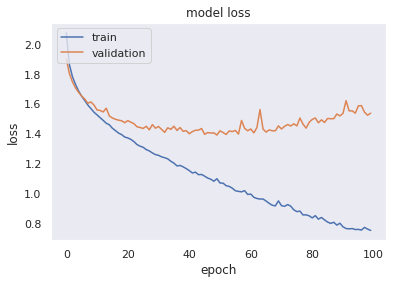

Evaluation on Testing set
{'loss': 1.4998942613601685, 'accuracy': 0.5249999761581421}


In [ ]:
## TASK 4: ADD DROPOUT LAYERS TO THE MODEL AND RUN THE MLP TRAINING, PLOT YOUR TRAINIG LOGS (using plotLosses) AND SHOW THE SCORES ON THE TESTING SET
## TIPS: USE THE SAME MLP ARCHITECTURE AS IN PREVIOUS MODELS 

from tensorflow.keras.layers import Dense, Dropout, Flatten

## YOUR CODE STARTS HERE ##

def create_MLP():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=3072))
  model.add(Dropout(0.1))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(10, activation='softmax'))
  return model

def get_optimizer():
  return SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model=create_MLP()
model.compile(optimizer=get_optimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
historyMLP = model.fit(X_train,y_train, epochs=nepochs, batch_size=batch_size, verbose=2, validation_split=validation_split)

def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid()
    plt.show()

plotLosses(historyMLP)
print('Evaluation on Testing set')
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(dict(zip(model.metrics_names, score)))


## YOUR CODE ENDS HERE ## 

**Q7**: What has been the effect of adding the dropout layer ? 

**Answer**: it has reduced overfitting (and it is precisely its aim). However, alone, I found it less efficient than the other two methods.

Epoch 1/100
49/49 - 5s - loss: 2.0011 - accuracy: 0.3255 - val_loss: 2.0963 - val_accuracy: 0.2425
Epoch 2/100
49/49 - 3s - loss: 1.6749 - accuracy: 0.4133 - val_loss: 1.8488 - val_accuracy: 0.3434
Epoch 3/100
49/49 - 3s - loss: 1.5736 - accuracy: 0.4466 - val_loss: 1.7069 - val_accuracy: 0.4185
Epoch 4/100
49/49 - 3s - loss: 1.5162 - accuracy: 0.4635 - val_loss: 1.7003 - val_accuracy: 0.3892
Epoch 5/100
49/49 - 3s - loss: 1.4713 - accuracy: 0.4784 - val_loss: 1.6473 - val_accuracy: 0.4202
Epoch 6/100
49/49 - 3s - loss: 1.4234 - accuracy: 0.4966 - val_loss: 1.6653 - val_accuracy: 0.3981
Epoch 7/100
49/49 - 3s - loss: 1.3886 - accuracy: 0.5091 - val_loss: 1.6859 - val_accuracy: 0.3928
Epoch 8/100
49/49 - 3s - loss: 1.3610 - accuracy: 0.5188 - val_loss: 1.6268 - val_accuracy: 0.4289
Epoch 9/100
49/49 - 3s - loss: 1.3296 - accuracy: 0.5326 - val_loss: 1.5878 - val_accuracy: 0.4376
Epoch 10/100
49/49 - 3s - loss: 1.2974 - accuracy: 0.5362 - val_loss: 1.6573 - val_accuracy: 0.4145
Epoch 11/

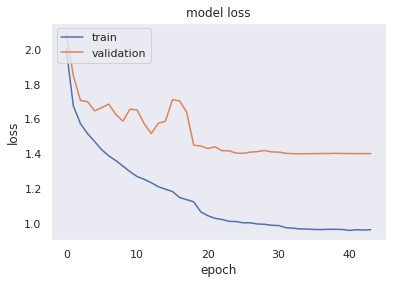

Evaluation on Testing set
{'loss': 1.382408618927002, 'accuracy': 0.5196999907493591}


In [ ]:
## TASK 5: IMPLEMENT AN MLP MODEL USING ALL THE PREVIOUS USED REGULARIZATION METHODS AS WELL AS BATCH NORMALIZATION AND COMPARE IT TO THE PREVIOUS RESULTS 

from tensorflow.keras.layers import BatchNormalization

## YOUR CODE STARTS HERE 

def create_MLP():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=3072))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Dense(10, activation='softmax'))
  return model

def get_optimizer():
  return SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model=create_MLP()
model.compile(optimizer=get_optimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback_es = EarlyStopping(monitor='val_loss', patience=10)
callback_lr = ReduceLROnPlateau(monitor='val_loss', patience=5)

historyMLP = model.fit(X_train,y_train, epochs=nepochs, batch_size=batch_size, callbacks = [callback_es, callback_lr], verbose=2, validation_split=validation_split)

def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid()
    plt.show()

plotLosses(historyMLP)
print('Evaluation on Testing set')
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(dict(zip(model.metrics_names, score)))

## YOUR CODEE ENDS HERE 

It has not changed significantly in comparison with the model that has only ReduceLROnPlateau. I suppose it is due to the fact that the minimum they both reach is unique in this case...

In [5]:
##CHALLENGE TASK : USING A MODEL OF YOUR CHOICE (MLP, CNN, ...) BUILD WITH 
##KERAS A CLASSIFIER ON THE CIFAR DATASET USING THE TECHNICS SEEN IN THIS 
##NOTEBOOK IN ORDER TO YIELD THE SMALLEST HIGHEST ACCURACY ON THE TEST SET 

##EXPLAIN WHAT YOU HAVE DONE AND PRESENT CLEARLY YOUR RESULTS


## TIPS 1: Use Data Augmentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
## TIPS 2: You are allowed to play around with training algorithms 
## TIPS 3: It is recommanded to implement skip connections (see ResNet)

Epoch 1/100
1250/1250 - 39s - loss: 1.9776 - accuracy: 0.3048 - val_loss: 1.8438 - val_accuracy: 0.3371
Epoch 2/100
1250/1250 - 38s - loss: 1.8303 - accuracy: 0.3480 - val_loss: 1.7248 - val_accuracy: 0.3803
Epoch 3/100
1250/1250 - 41s - loss: 1.7656 - accuracy: 0.3650 - val_loss: 1.6889 - val_accuracy: 0.3940
Epoch 4/100
1250/1250 - 38s - loss: 1.7102 - accuracy: 0.3857 - val_loss: 1.6117 - val_accuracy: 0.4204
Epoch 5/100
1250/1250 - 40s - loss: 1.6772 - accuracy: 0.3984 - val_loss: 1.6134 - val_accuracy: 0.4161
Epoch 6/100
1250/1250 - 38s - loss: 1.6548 - accuracy: 0.4033 - val_loss: 1.6055 - val_accuracy: 0.4162
Epoch 7/100
1250/1250 - 38s - loss: 1.6260 - accuracy: 0.4164 - val_loss: 1.5607 - val_accuracy: 0.4351
Epoch 8/100
1250/1250 - 40s - loss: 1.6085 - accuracy: 0.4207 - val_loss: 1.5543 - val_accuracy: 0.4360
Epoch 9/100
1250/1250 - 38s - loss: 1.5970 - accuracy: 0.4258 - val_loss: 1.5227 - val_accuracy: 0.4490
Epoch 10/100
1250/1250 - 40s - loss: 1.5839 - accuracy: 0.4284 -

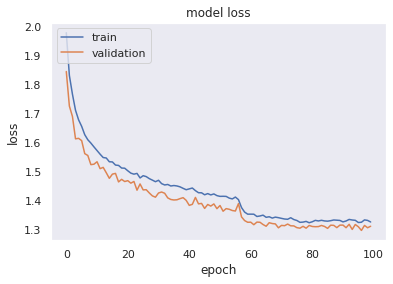

Evaluation on Testing set
{'loss': 109.6006088256836, 'accuracy': 0.23980000615119934}


In [9]:
## YOUR CODE STARTS HERE ##

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


def create_MLP():
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(256, activation='relu', input_dim=3072))
  model.add(BatchNormalization())
  model.add(Dropout(0.01))
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.01))
  model.add(Dense(10, activation='softmax'))
  return model

def get_optimizer():
  return SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model=create_MLP()
model.compile(optimizer=get_optimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback_es = EarlyStopping(monitor='val_loss', patience=10)
callback_lr = ReduceLROnPlateau(monitor='val_loss', patience=5)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(X_train)

historyMLP = model.fit(datagen.flow(X_train, y_train, batch_size=32, subset='training'),
         validation_data=datagen.flow(X_train, y_train, batch_size=8, subset='validation'),
         epochs=nepochs, batch_size=batch_size, callbacks = [callback_es, callback_lr], verbose=2)

def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid()
    plt.show()

plotLosses(historyMLP)
print('Evaluation on Testing set')
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(dict(zip(model.metrics_names, score)))

## YOUR CODE ENDS HERE ##

This model did reduce the overfitting, because the training loss and the validation loss are almost equal. However, it can still be improved by editing the layers (adding / removing some of them, or changing some hyperparameters).